### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

#### Required Libraries are imported for the data analysis purpose

### MySQL connection

In [2]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', user='root', password='root')
    
    if conn.is_connected():
        cursor = conn.cursor()
        

except Error as e:
    print("Error while connecting to MySql", e)

#### Connect to the MySQL database to import the necessary dataset.

In [3]:
# import data from SQL

df2 = pd.read_sql("SELECT * From iris.d2", conn)
df2

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,Three dot Five
1,2,4.9,3.5
2,3,4.7,3.Five
3,4,4.6,3
4,5,5.0,3
...,...,...,...
145,146,6.7,3
146,147,6.3,2.5
147,148,6.5,3
148,149,6.2,3.4


In [4]:
# check first five rows of the dataset

df2.head()

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,Three dot Five
1,2,4.9,3.5
2,3,4.7,3.Five
3,4,4.6,3
4,5,5.0,3


In [5]:
# check last five rows of the dataset

df2.tail()

,Id,SepalLengthCm,SepalWidthCm
145,146,6.7,3
146,147,6.3,2.5
147,148,6.5,3
148,149,6.2,3.4
149,150,5.9,3


In [6]:
# checking data type of the dataset

df2.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm      object
dtype: object

### Observation: 
#### Dataset contains id column with integer data type, SepalLengthCM float data type and SepallWidthCm are object data types

In [7]:
# check the shape of the dataset

df2.shape

(150, 3)

In [8]:
print("Number of rows:",df2.shape[0])
print("Number of columns:",df2.shape[1])

Number of rows: 150
Number of columns: 3


In [9]:
# columns of the dataset

df2.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm'], dtype='object')

In [10]:
# info of the dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.6+ KB


### Observation: 
#### There are 150 rows & 3 columns in the dataset, memory usage for the dataset is 3.6kb. int, float and object are the datatypes

In [11]:
# overall statistics of the dataset

df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,29,3,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Null values

df2.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
dtype: int64

In [13]:
# check duplicated values any

df2[df2.duplicated()]

,Id,SepalLengthCm,SepalWidthCm


####  Observation: There are no duplicated values in the dataset

In [14]:
df2.duplicated().sum()

0

### Value_counts

In [15]:
# value counts of dataset

df2['SepalLengthCm'].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [16]:
df2['SepalWidthCm'].value_counts()

SepalWidthCm
3                 27
2.8               14
3.2               12
3.1               11
3.4               10
2.7                9
2.9                9
2.5                8
3.8                6
3.5                6
3.3                6
2.6                5
2.3                4
2.4                3
3.7                3
2.2                3
3.6                2
3.Five             1
2                  1
Three              1
Three.five         1
4.4                1
THREE Five         1
3.9                1
4.2                1
4.1                1
3.$                1
4                  1
Three dot Five     1
Name: count, dtype: int64

### Unique values in the dataset

In [17]:
# check number unique values in the SepalLength feature

print(f"Number of unique values present in SepalLength: {df2['SepalLengthCm'].nunique()}")

Number of unique values present in SepalLength: 35


In [18]:
# check the unique values

df2['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [19]:
# check number unique values in the SepalWidth feature

print(f"Number of unique values present in SepalWidth: {df2['SepalWidthCm'].nunique()}")

Number of unique values present in SepalWidth: 29


In [20]:
# check the unique values

df2['SepalWidthCm'].unique()

array(['Three dot Five', '3.5', '3.Five', '3', 'Three', 'Three.five',
       'THREE Five', '3.$', '3.1', '3.7', '3.4', '4', '4.4', '3.9', '3.8',
       '3.6', '3.3', '3.2', '4.1', '4.2', '2.3', '2.8', '2.4', '2.9',
       '2.7', '2', '2.2', '2.5', '2.6'], dtype=object)

<Figure size 1800x900 with 0 Axes>

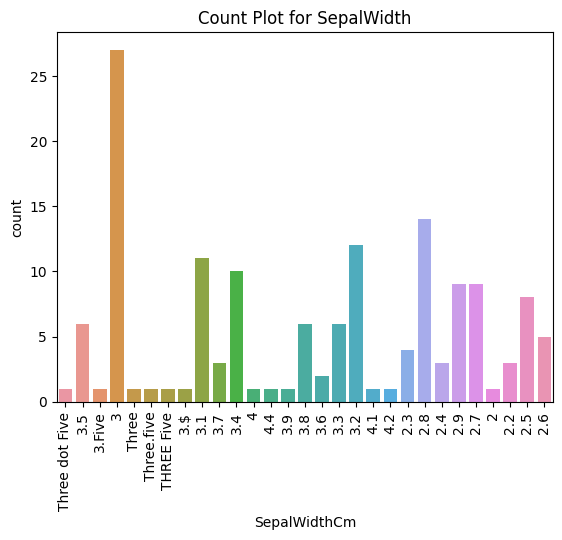

In [21]:
plt.figure(figsize =(20,10), dpi=90)
fig, ax = plt.subplots()
ax.plot()
plt.xticks(rotation=90)
sns.countplot(df2,x='SepalWidthCm')
plt.title("Count Plot for SepalWidth")
plt.show()

### Statistical Approach

In [22]:
print("Minimum value of SepalLenth in Cm:",df2['SepalLengthCm'].min())
print("Maximum value of SepalLenth in Cm:",df2['SepalLengthCm'].max())
print("Mean value of SepalLenth  in Cm:",df2['SepalLengthCm'].mean())
print("Median value of SepalLenth in Cm:",df2['SepalLengthCm'].median())
print("Mode value of SepalLenth in Cm:",df2['SepalLengthCm'].mode()[0])

Minimum value of SepalLenth in Cm: 4.3
Maximum value of SepalLenth in Cm: 7.9
Mean value of SepalLenth  in Cm: 5.843333333333334
Median value of SepalLenth in Cm: 5.8
Mode value of SepalLenth in Cm: 5.0


In [23]:
# Skewness

df2['SepalLengthCm'].skew()

0.3149109566369728

In [24]:
# Kurtosis

df2['SepalLengthCm'].kurt()

-0.5520640413156395

In [25]:
# check Standard deviation of SepalLengthCm

df2['SepalLengthCm'].std()

0.828066127977863

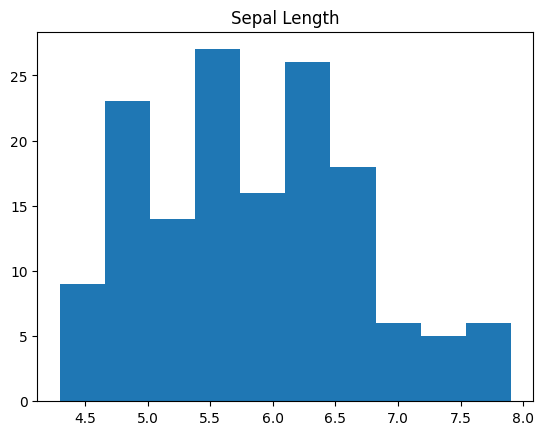

In [26]:
plt.hist(df2['SepalLengthCm'])
plt.title("Sepal Length");

### Test Normality using shapiro-wilk test

In [27]:
# To test the column 'PetalLengthCm'

from scipy.stats import shapiro

Data_to_test  = df2['SepalLengthCm']
stat, p = shapiro(Data_to_test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.98, p=0.010180265642702579498291015625
Not a Normal Distribution


### Dataset_2 Analysis:

#### 1. Importing the dataset.
#### 2. The dataset consists of 150 records and 3 features.
#### 3. The three features are 'Id', 'SepalLengthCm', and 'SepalWidthCm'.
#### 4. 'SepalLengthCm' is of float data type, while 'SepalWidthCm' is of object data type.
#### 5. 'SepalLengthCm' falls under the category of quantitative data, with values ranging from 4.3 to 7.9.
#### 6. 'SepalWidthCm' is primarily of float data type, but a few rows contain string values, causing inconsistency.
#### 7. It is advisable to convert 'SepalWidthCm' to float data type and adjust the corresponding values to ensure consistent data types and gain more valuable insights. For example, converting "three dot five" to 3.5.
#### 8. Investigating for missing values, it is found that the there are no missing values in the dataset.
#### 9. To visualize the distribution of the 'SepalWidthCm' feature, a count plot is used to determine the actual data count.
#### 10. Applying statistical methods to the 'SepalLengthCm' feature, the observations are as follows:
#### 11. The data is positively skewed, with no prominent peaks observed according to the skewness and kurtosis methods.
#### 11. The standard deviation of the 'SepalLengthCm' feature is 0.83.
#### 12. By examining the histogram, it can be concluded that the 'SepalLengthCm' feature represents continuous data.
#### 13. However, the data within the 'SepalLengthCm' feature does not follow a normal distribution.
#### Conclusion: To enhance the analysis, it is recommended to convert the 'SepalWidth' variable to float data type and adjust the corresponding data values. Subsequently, a thorough investigation of the statistical characteristics of sepal width and its relationship with 'SepalLengthCm' should be conducted.